In [ ]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import f1_score

In [ ]:
data=pd.read_csv("brain_stroke.csv")

In [ ]:
data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
data.shape

(4981, 11)

**DATA VISUALIZATION**

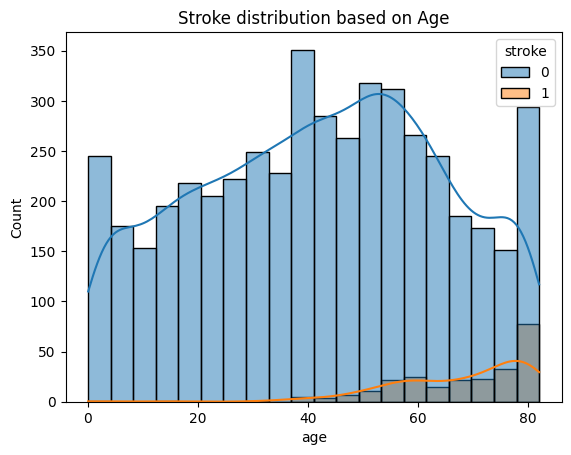

In [ ]:
sns.histplot(x='age',hue='stroke',data=data,kde=True)
plt.title('Stroke distribution based on Age')
plt.show()

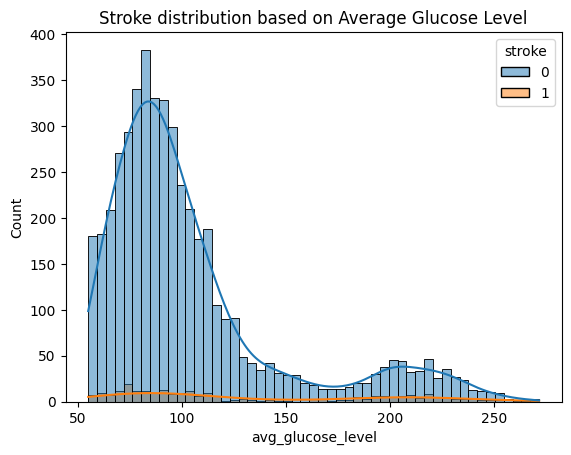

In [ ]:
sns.histplot(x='avg_glucose_level', hue='stroke', data=data, kde=True)
plt.title('Stroke distribution based on Average Glucose Level')
plt.show()

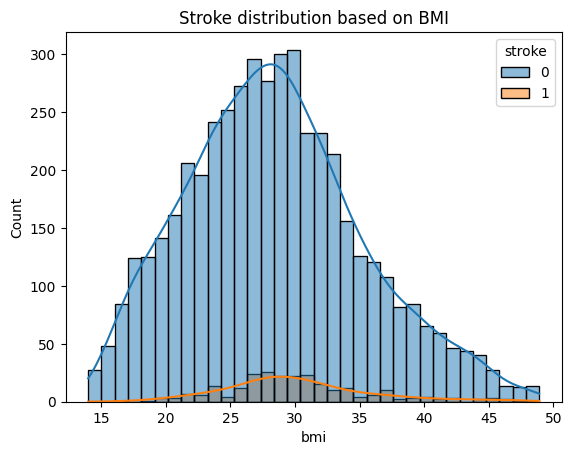

In [ ]:
sns.histplot(x='bmi', hue='stroke', data=data, kde=True)
plt.title('Stroke distribution based on BMI')
plt.show()

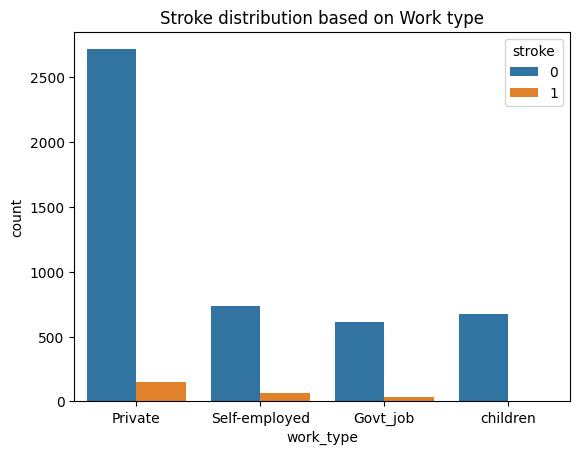

In [ ]:
sns.countplot(x='work_type',hue='stroke',data=data)
plt.title('Stroke distribution based on Work type')
plt.show()

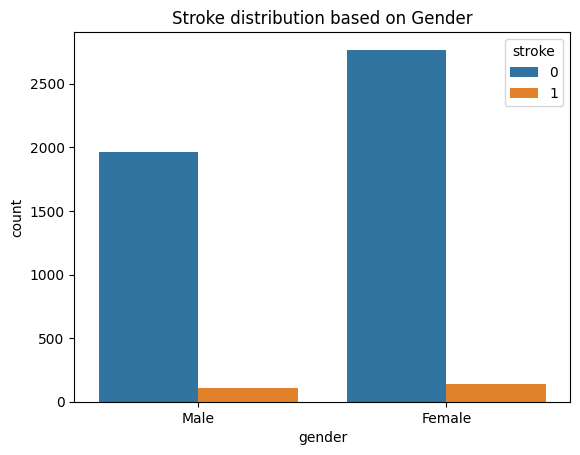

In [ ]:
sns.countplot(x='gender',hue='stroke',data=data)
plt.title('Stroke distribution based on Gender')
plt.show()

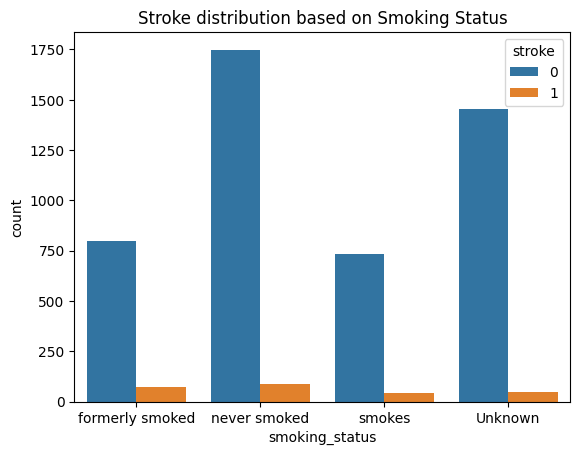

In [ ]:
sns.countplot(x='smoking_status',hue='stroke',data=data)
plt.title('Stroke distribution based on Smoking Status')
plt.show()

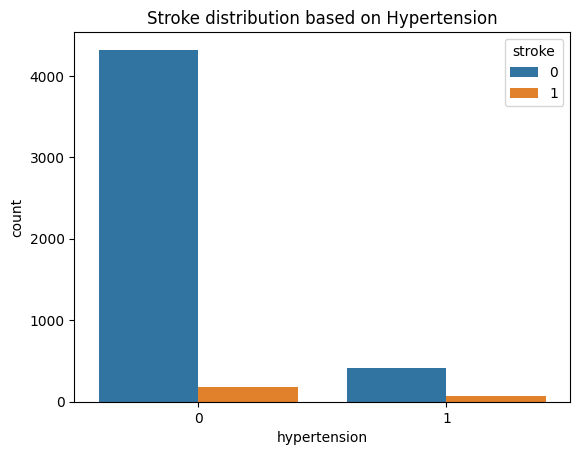

In [ ]:
sns.countplot(x='hypertension',hue='stroke',data=data)
plt.title('Stroke distribution based on Hypertension')
plt.show()

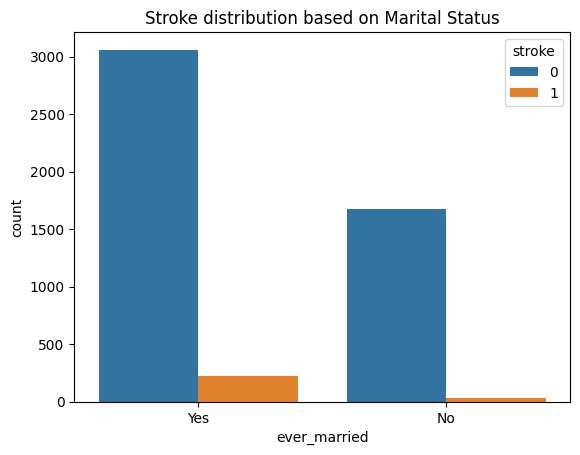

In [ ]:
sns.countplot(x='ever_married',hue='stroke',data=data)
plt.title('Stroke distribution based on Marital Status')
plt.show()

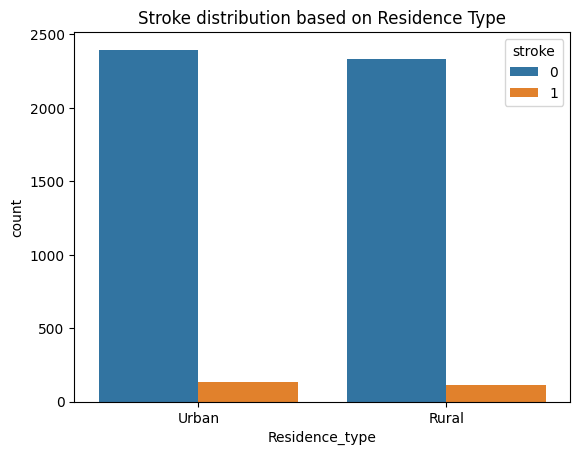

In [ ]:
sns.countplot(x='Residence_type',hue='stroke',data=data)
plt.title('Stroke distribution based on Residence Type')
plt.show()

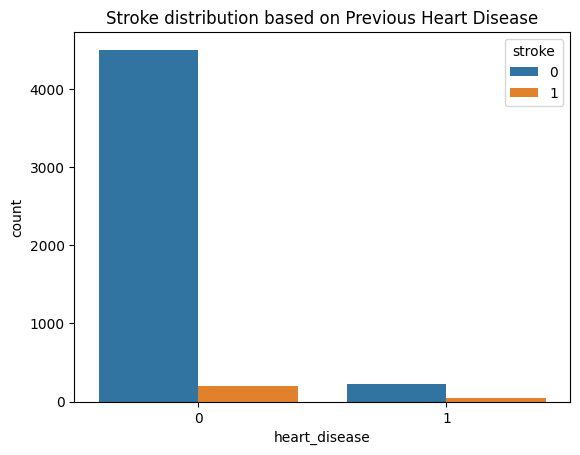

In [ ]:
sns.countplot(x='heart_disease',hue='stroke',data=data)
plt.title('Stroke distribution based on Previous Heart Disease')
plt.show()

**DATA PREPROCESSING**

In [ ]:
data.isnull().sum()


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
X=data.iloc[:,0:10]
Y=data.iloc[:,10]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
a=le.fit_transform(X['gender'])
b=le.fit_transform(X['ever_married'])
c=le.fit_transform(X['work_type'])
d=le.fit_transform(X['Residence_type'])
e=le.fit_transform(X['smoking_status'])

In [ ]:
X['gender']=a
X['ever_married']=b
X['work_type']=c
X['Residence_type']=d
X['smoking_status']=e

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

**USING SVC from SVM**

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

In [ ]:
clf=svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [ ]:
pred_clf=clf.predict(X_test)

In [ ]:
sklearn.metrics.accuracy_score(y_test,pred_clf)

0.9528585757271816

**USING RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
cf= RandomForestClassifier(n_estimators=30,random_state=0)
cf.fit(X_train,y_train)
y_pred=cf.predict(X_test)

In [ ]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.9518555667001003

**USING K-Nearest Neighbours**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.9478435305917753

**USING LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()
logr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=logr.predict(X_test)

In [ ]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.9518555667001003

**USING LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression
lgr=LinearRegression()
lgr.fit(X_train,y_train)
y_pred=lgr.predict(X_test)
y_pred=(y_pred>0.5).astype(int)

In [ ]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.9528585757271816

**USING NEURAL NETWORKS**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model=keras.Sequential(
    [
        layers.Dense(1024,activation='relu'),
        layers.Dense(512,activation='relu'),
        layers.Dense(256,activation='relu'),
        layers.Dense(128,activation='relu'),
        layers.Dense(128,activation='sigmoid'),
        layers.Dense(64,activation='relu'),
        layers.Dense(32,activation='relu'),
        layers.Dense(32,activation='sigmoid'),
        layers.Dense(16,activation='relu'),
        layers.Dense(8,activation='relu'),
    ]
)

In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

In [ ]:
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
125/125 [==============================] - 4s 17ms/step - loss: 1.0727 - accuracy: 0.7518
Epoch 2/50
125/125 [==============================] - 3s 21ms/step - loss: 0.3187 - accuracy: 0.9495
Epoch 3/50
125/125 [==============================] - 2s 16ms/step - loss: 0.2999 - accuracy: 0.9495
Epoch 4/50
125/125 [==============================] - 2s 14ms/step - loss: 0.2807 - accuracy: 0.9495
Epoch 5/50
125/125 [==============================] - 2s 14ms/step - loss: 0.2684 - accuracy: 0.9495
Epoch 6/50
125/125 [==============================] - 2s 14ms/step - loss: 0.2736 - accuracy: 0.9495
Epoch 7/50
125/125 [==============================] - 2s 14ms/step - loss: 0.2701 - accuracy: 0.9495
Epoch 8/50
125/125 [==============================] - 2s 15ms/step - loss: 0.2660 - accuracy: 0.9495
Epoch 9/50
125/125 [==============================] - 2s 20ms/step - loss: 0.2669 - accuracy: 0.9495
Epoch 10/50
125/125 [==============================] - 3s 21ms/step - loss: 0.2625 - accura

In [ ]:
model.evaluate(X_test,y_test)

32/32 [==============================] - 0s 4ms/step - loss: 0.2683 - accuracy: 0.9529


[0.2683444619178772, 0.952858567237854]

In [ ]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.9528585757271816